# Datathon Week 1

Having the NYC problem we are going to explore multiple approaches on how to handle the data to answer some questions.

## Questions

 * What is the most used transportation method?
 * How uber behavior vs other transportation methods (in use)?
 * In which nta the people uses more uber?
 * 


In [1]:
import pandas as pd
import os

data_folder = '../Dataset'

dataset_names = ['demographics', 'geographic', 'green_trips', 'mta_trips',
            'uber_trips_2014', 'uber_trips_2015', 'weather', 'yellow_trips', 'zones']
datasets = {}
for dataset_name in dataset_names:
    filename = f"{dataset_name}.csv"
    filepath = os.path.join(data_folder, filename)
    datasets[dataset_name] = pd.read_csv(filepath, dtype = { 'line_name': str }) if dataset_name == 'mta_trips' else pd.read_csv(filepath)
    print(f"loaded: {filepath}")

print('All datasets loaded!')

loaded: ../Dataset/demographics.csv
loaded: ../Dataset/geographic.csv
loaded: ../Dataset/green_trips.csv
loaded: ../Dataset/mta_trips.csv
loaded: ../Dataset/uber_trips_2014.csv
loaded: ../Dataset/uber_trips_2015.csv
loaded: ../Dataset/weather.csv
loaded: ../Dataset/yellow_trips.csv
loaded: ../Dataset/zones.csv
All datasets loaded!


In [2]:
name_to_explore = 'demographics'

datasets[name_to_explore].head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [3]:
datasets['uber_trips_2014'].head()

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


I want to join the zones and demographics data

In [4]:
datasets['zones_demographics'] = pd.merge(datasets['zones'], datasets['demographics'], how = 'left')
datasets['zones_demographics'].head()

,location_id,borough,zone,service_zone,nta_code,nta_name,population,under_5_years,5-9_years,10-14_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,1,EWR,Newark Airport,EWR,NJ01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Queens,Jamaica Bay,Boro Zone,QN61,Jamaica,53751.0,3818.0,3468.0,3281.0,...,2407.0,2023.0,2647.0,2995.0,1363.0,1223.0,574.0,276.0,39763.0,53129.0
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31,Allerton-Pelham Gardens,28903.0,1679.0,1706.0,1763.0,...,797.0,773.0,1160.0,1764.0,1155.0,1562.0,765.0,427.0,61638.0,78489.0
3,4,Manhattan,Alphabet City,Yellow Zone,MN22,East Village,44136.0,862.0,617.0,598.0,...,2072.0,1524.0,1702.0,3160.0,3057.0,3201.0,2155.0,2478.0,72665.0,100130.0
4,5,Staten Island,Arden Heights,Boro Zone,SI48,Arden Heights,25238.0,1507.0,1540.0,1596.0,...,337.0,516.0,707.0,1421.0,1611.0,2021.0,1047.0,740.0,89570.0,101627.0


I want to merge the uber 2015 dataset with the zones to increase the amount of data.

In [5]:
uber_2015 = pd.merge(datasets['uber_trips_2015'], datasets['zones_demographics'], how = 'left', left_on = ['pickup_location_id'], right_on = ['location_id'])

uber_2015.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,location_id,borough,zone,service_zone,nta_code,nta_name,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,2015-05-17 09:47:00,141,B02617,B02617,141.0,Manhattan,Lenox Hill West,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,...,2026.0,2232.0,3032.0,5984.0,4880.0,7056.0,3654.0,10674.0,98797.0,157345.0
1,2015-05-17 09:47:00,65,B02617,B02617,65.0,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,...,1351.0,805.0,1317.0,1674.0,1620.0,2587.0,1569.0,3000.0,84945.0,123292.0
2,2015-05-17 09:47:00,100,B02617,B02617,100.0,Manhattan,Garment District,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,...,2694.0,2156.0,3422.0,4460.0,3866.0,6217.0,3957.0,10711.0,101369.0,182129.0
3,2015-05-17 09:47:00,80,B02617,B02774,80.0,Brooklyn,East Williamsburg,Boro Zone,BK90,East Williamsburg,...,1902.0,1426.0,1610.0,2243.0,1693.0,2219.0,1002.0,618.0,50777.0,69329.0
4,2015-05-17 09:47:00,90,B02617,B02617,90.0,Manhattan,Flatiron,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,...,2694.0,2156.0,3422.0,4460.0,3866.0,6217.0,3957.0,10711.0,101369.0,182129.0


In [6]:
uber_2015['pickup_datetime'] = pd.to_datetime(datasets['uber_trips_2015']['pickup_datetime'])

uber_2015.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,location_id,borough,zone,service_zone,nta_code,nta_name,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,2015-05-17 09:47:00,141,B02617,B02617,141.0,Manhattan,Lenox Hill West,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,...,2026.0,2232.0,3032.0,5984.0,4880.0,7056.0,3654.0,10674.0,98797.0,157345.0
1,2015-05-17 09:47:00,65,B02617,B02617,65.0,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,...,1351.0,805.0,1317.0,1674.0,1620.0,2587.0,1569.0,3000.0,84945.0,123292.0
2,2015-05-17 09:47:00,100,B02617,B02617,100.0,Manhattan,Garment District,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,...,2694.0,2156.0,3422.0,4460.0,3866.0,6217.0,3957.0,10711.0,101369.0,182129.0
3,2015-05-17 09:47:00,80,B02617,B02774,80.0,Brooklyn,East Williamsburg,Boro Zone,BK90,East Williamsburg,...,1902.0,1426.0,1610.0,2243.0,1693.0,2219.0,1002.0,618.0,50777.0,69329.0
4,2015-05-17 09:47:00,90,B02617,B02617,90.0,Manhattan,Flatiron,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,...,2694.0,2156.0,3422.0,4460.0,3866.0,6217.0,3957.0,10711.0,101369.0,182129.0


I want to do the same but with the uber 2014 data, but because it's with longitud and latitud We need to understand how this works

We need to map over the dataframe, and the column is going to be iterating over every column until it finds it

In [9]:
from shapely.geometry import MultiPoint

geo_df = datasets['geographic']
rows, cols = geo_df.shape

# Build a hash with the location_id as key and Polygon as value
geo_polygons = {}
for location_id in geo_df.columns:
    poly_points = geo_df[location_id]

    half_range = range(int(rows / 2))
    coordinates = [(poly_points[i * 2], poly_points[i * 2 + 1]) for i in half_range]
    poly = MultiPoint(coordinates).convex_hull
    geo_polygons[location_id] = poly

We can check the forms of the polygons just in case we want to see locations

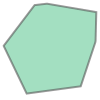

In [10]:
location_id = 'BX59'
geo_polygons[location_id]

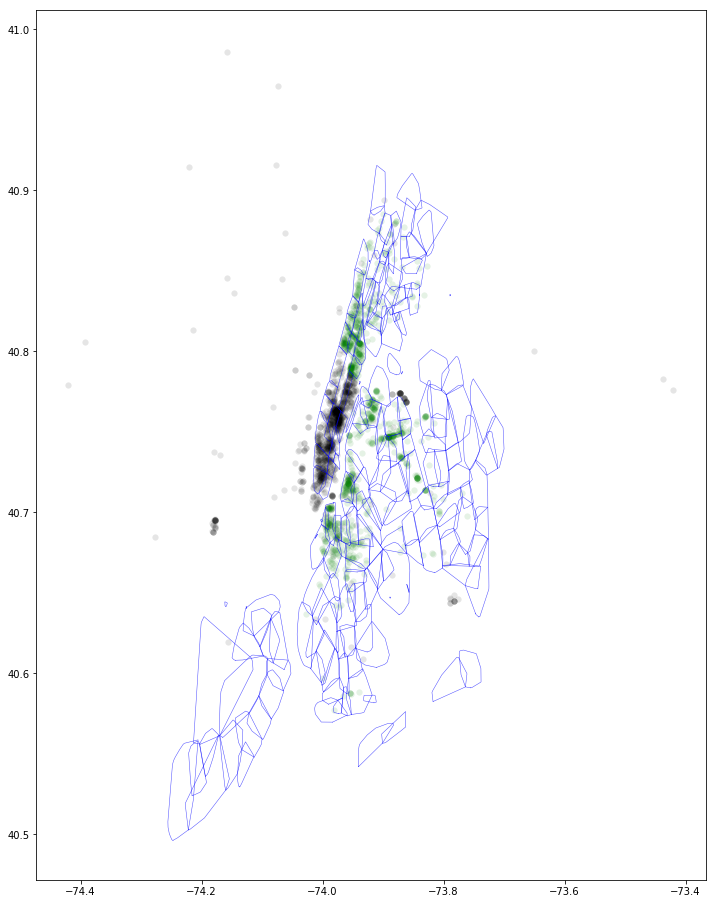

In [101]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch

fig = plt.figure(figsize = (12, 16))

for key, value in geo_polygons.items():
    x, y = value.exterior.xy
    
    ax = fig.add_subplot(111)
    ax.plot(x, y, color = 'blue', alpha = 0.7, linewidth = 0.5)

#     ring = PolygonPatch(value)
#     ax.add_patch(ring)

for i, row in datasets['uber_trips_2014'].head(1000).iterrows():
    x, y = row['pickup_longitude'], row['pickup_latitude']
    ax = fig.add_subplot(111)
    ax.scatter(x = x, y = y, linewidth = 0.1, alpha = 0.1, color = 'black')

for i, row in datasets['green_trips'][datasets['green_trips']['pickup_latitude'] != 0].head(1000).iterrows():
    x, y = row['pickup_longitude'], row['pickup_latitude']
    ax = fig.add_subplot(111)
    ax.scatter(x = x, y = y, linewidth = 0.1, alpha = 0.1, color = 'green')

Now i want to map over the column of the 2014 uber data to find the location id

In [ ]:
from shapely.geometry import Point

def find_location_id(row):
    latitude = row['pickup_latitude']
    longitude = row['pickup_longitude']
    
    point = Point(longitude, latitude)
    trip_location_id = None
    for location_id in list(geo_polygons.keys()):
        polygon = geo_polygons[location_id]
        if point.within(polygon):
            trip_location_id = location_id
            break
    return trip_location_id

new_uber_2014 = uber_2014.copy()
result = uber_2014.apply(find_location_id, axis = 1)
result.head()

## Remeber to use the new geographical data instead of the original to be more precise

In [ ]:
new_uber_2014['location_id'] = result.map(lambda x: None if x == string.empty else x)
new_uber_2014.head()


Now the idea is that the uber 2014 uses the same columns as the 2015 uber so we can append the 2 datasets together, thiw way we are going to have all the uber data integrated in one data frame

We could aggregate the data for the taxis also, if this take too long it's not practical so I will suggest to only left taxi trips that match the same dates as the uber rides so we can compare it. if not, the search in polygons would take too long

/Users/juanprq/.local/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


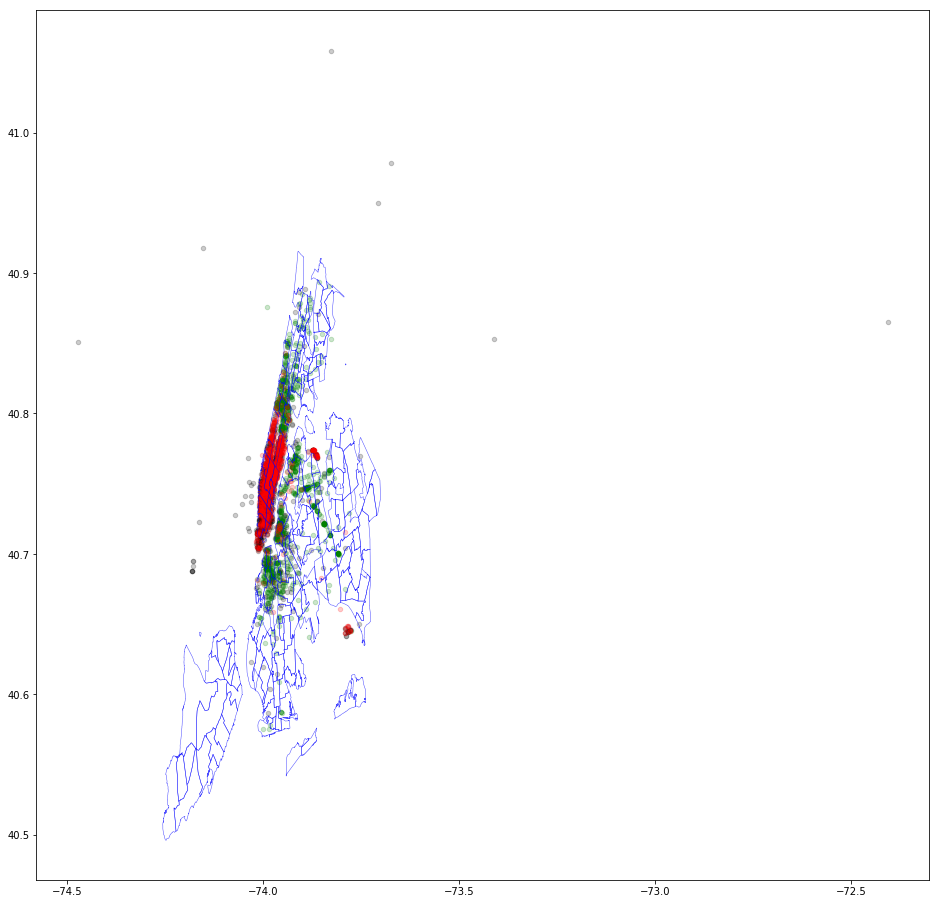

In [198]:
import json
geo_json_path = '../Dataset/geo_json.json'

alpha = 0.2
radius = 20
sample_size = 1000

geo_json = {}
with open(geo_json_path, 'r') as reader:
    geo_json = json.loads(reader.read())

fig = plt.figure(figsize = (16, 16))
for geo_info in geo_json['features']:
    coordinates = geo_info['geometry']['coordinates'][0]
    if len(coordinates) == 1:
        coordinates = coordinates[0]
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]

    ax = fig.add_subplot(111)
    ax.plot(x, y, color = 'blue', alpha = 0.7, linewidth = 0.5)

for i, row in datasets['uber_trips_2014'].sample(sample_size).iterrows():
    x, y = row['pickup_longitude'], row['pickup_latitude']
    ax = fig.add_subplot(111)
    ax.scatter(x = x, y = y, s = radius, alpha = alpha, color = 'black')

for i, row in datasets['green_trips'][datasets['green_trips']['pickup_latitude'] != 0].sample(sample_size).iterrows():
    x, y = row['pickup_longitude'], row['pickup_latitude']
    ax = fig.add_subplot(111)
    ax.scatter(x = x, y = y, s = radius, alpha = alpha, color = 'green')

for i, row in datasets['yellow_trips'][datasets['yellow_trips']['pickup_latitude'] != 0].sample(sample_size).iterrows():
    x, y = row['pickup_longitude'], row['pickup_latitude']
    ax = fig.add_subplot(111)
    ax.scatter(x = x, y = y, s = radius, alpha = alpha, color = 'red')

In [209]:
import folium

folium_map = folium.Map(location = [40.738, -73.98],
                        zoom_start = 10,
                        tiles = 'OpenStreetMap')

for i, row in datasets['uber_trips_2014'].sample(2000).iterrows():
    longitude, latitude = row['pickup_longitude'], row['pickup_latitude']
    marker = folium.CircleMarker(location = [latitude, longitude], radius = 3, color = 'black', fill = True, stroke = False)
    marker.add_to(folium_map)

folium_map

In [280]:
folium_map = folium.Map(location = [40.738, -73.98],
                        zoom_start = 10,
                        tiles = 'Stamen Terrain')

for geo_info in geo_json['features']:
    coordinates = geo_info['geometry']['coordinates'][0]
    if len(coordinates) == 1:
        coordinates = coordinates[0]
    coordinates = [[coord[1], coord[0]] for coord in coordinates]

    polygon = folium.Polygon(locations = coordinates, weight = 1, fill = True, color = 'blue')
    polygon.add_to(folium_map)

def embed_map(m):
    from IPython.display import IFrame

    m.save('../Dataset/map.html')
    return IFrame('../Dataset/map.html', width='100%', height='750px')

embed_map(folium_map)

One idea is to remove all points that are not inside a polygon

In [306]:
datasets['mta_trips'].groupby('station')[['latitude', 'longitude']].first()

,latitude,longitude
station,,
1 AVE,40.730953,-73.981628
103 ST,40.796092,-73.961454
104 ST,40.695178,-73.844330
110 ST,40.795020,-73.944250
110 ST-CATHEDRL,40.800605,-73.958158
110 ST-CPN,40.800605,-73.958158
111 ST,40.697418,-73.836345
116 ST,40.805085,-73.954882
116 ST-COLUMBIA,40.807722,-73.964110


In [307]:
datasets['yellow_trips']

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.80
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.00
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.50
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.50
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.50
5,2014-05-11 13:09:24,2014-05-11 13:19:18,-73.978131,40.748238,-73.984475,40.749268,1,1.30,11.05
6,2014-05-05 16:46:00,2014-05-05 16:49:00,-73.994868,40.745097,-74.004258,40.731687,2,1.10,8.30
7,2014-05-19 01:24:51,2014-05-19 01:37:11,-73.974711,40.764945,-73.916280,40.766681,1,4.00,15.50
8,2014-05-26 01:12:14,2014-05-26 01:34:44,-73.988324,40.723345,-73.953039,40.809264,1,7.50,24.50
9,2014-05-09 18:45:09,2014-05-09 18:57:12,-73.969744,40.753129,-73.988274,40.727640,1,2.00,13.80
